In [59]:
import numpy as np
import scipy.special as sps
import matplotlib.pyplot as plt
from numpy import random
import tensorflow as tf
from tensorflow import keras

def uni(mu1,mu2,sig1,sig2,p):

    d = 0.5*abs(mu1-mu2)/np.sqrt(sig1*sig2)
    if d<=1:
        return 1
    elif abs(np.log(1-p)-np.log(p)) >=2*np.log(d-np.sqrt(d**2-1))+2*d*np.sqrt(d**2-1):
        return 1
    else:
        return 0

In [99]:
Nexamples    = 20000
Nsamples     = 100
Nbins        = 100
bin_edges    = np.linspace(-4, 5, Nbins+1)
bincenters   = 0.5*(bin_edges[:-1]+bin_edges[1:])
histo_counts = np.zeros((Nbins, Nexamples))


X = np.zeros((Nsamples, Nexamples))
Pars = np.random.uniform(0,1,(5, Nexamples)) # mu1 mu2 sig1 sig2 p1
Pars[1,:] = Pars[1,:]+1.2  # mu2+1
G = np.random.normal(0,1,(Nsamples, Nexamples))
U = np.random.uniform(0,1,(Nsamples, Nexamples))
Y = np.zeros(( Nexamples))


for i in range(Nexamples):
    mu1, mu2, sig1, sig2, p1 = Pars[:,i]
    Y[i] = uni(mu1, mu2, sig1, sig2, p1)
    r = U[:,i]
    mu = mu1*(r<p1) + mu2*(r>=p1)
    sig = sig1*(r<p1) + sig2*(r>=p1)
    X[:,i] = mu+sig*G[:,1]
        
    counts, bin_edges = np.histogram(X[:,i], bins=bin_edges, density=  False)
    histo_counts[:,i] = counts
        

print('Mean Uni= '+str(np.mean(Y)))










Mean Uni= 0.51455


In [61]:
XX = histo_counts.T

# XX = np.array([XX[i,:] for i in range(Nexamples)])

# XX = F
Ntrain = int(Nexamples*0.7)

print(XX.shape)
train_images = XX[0:Ntrain,:]
test_images  = XX[Ntrain+1:,:]
train_labels = Y[0:Ntrain]
test_labels  = Y[Ntrain+1:]

# train_images.shape
train_images = train_images/Nsamples
test_images = test_images/Nsamples
print(train_images.shape)
print(train_labels.shape)


model = keras.Sequential([
#     keras.layers.Flatten(input_shape = (1,100)),
    keras.layers.Dense(300, activation=tf.nn.relu , input_shape = (Nbins,)),
#     keras.layers.Dense(Nbins,activation=tf.nn.relu),
#     keras.layers.Dense(10,activation=tf.nn.softmax),
    keras.layers.Dense(2,activation=tf.nn.softmax)
])

model.compile(optimizer = "adam",
              loss="sparse_categorical_crossentropy",
             metrics = ["accuracy"])

model.fit(train_images, train_labels, epochs=100)


(20000, 100)
(14000, 100)
(14000,)
Epoch 1/100
438/438 [==============================] - 1s 727us/step - loss: 0.5864 - accuracy: 0.7287
Epoch 2/100
438/438 [==============================] - 0s 841us/step - loss: 0.4445 - accuracy: 0.8059
Epoch 3/100
438/438 [==============================] - 0s 688us/step - loss: 0.4205 - accuracy: 0.8143
Epoch 4/100
438/438 [==============================] - 0s 641us/step - loss: 0.3969 - accuracy: 0.8257
Epoch 5/100
438/438 [==============================] - 0s 643us/step - loss: 0.3804 - accuracy: 0.8401
Epoch 6/100
438/438 [==============================] - 0s 650us/step - loss: 0.3697 - accuracy: 0.8416
Epoch 7/100
438/438 [==============================] - 0s 652us/step - loss: 0.3460 - accuracy: 0.8594
Epoch 8/100
438/438 [==============================] - 0s 645us/step - loss: 0.3407 - accuracy: 0.8625
Epoch 9/100
438/438 [==============================] - 0s 645us/step - loss: 0.3315 - accuracy: 0.8635
Epoch 10/100
438/438 [================

In [100]:
test_loss, test_acc = model.evaluate(test_images, test_labels)


188/188 [==============================] - 0s 658us/step - loss: 0.2848 - accuracy: 0.8798


Prediction: Unimodal   Actual: Unimodal 
[0.05087383 0.9491262 ]


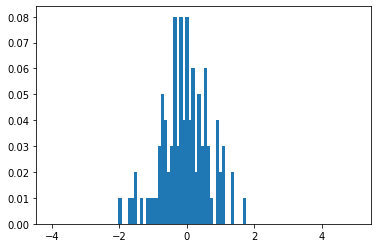

In [106]:
predictions = model.predict(test_images)

peaks = ['Bimodal', 'Unimodal']

# k = 17
k = 17
print(f"Prediction: {peaks[np.argmax(predictions[k])]}   Actual: {peaks[int(test_labels[k])]} ")



_=plt.bar(bincenters, test_images[k],0.1)
print(predictions[k])


In [31]:
5/9

0.5555555555555556

In [27]:
# getSarleIndex(bincenters,train_images[1],10)
getKurt(bincenters,train_images[100],10)

6.948273851295081

In [21]:
bincenters.shape

(100,)